# Getting Dataset

In [1]:
import os
import fastaparser
import random
from heapq import nlargest
import numpy as np

def get_files(typeOFfile, val_organism : str = "Saccharomyces_cerevisiae", justForVal : bool = False):
    if justForVal == False:
        for dir in os.listdir("./data/"):
            if dir == val_organism: continue
            for file in os.listdir("./data/" + dir):
                if typeOFfile in file:
                    yield("./data/" + dir +"/"+file)
    else:
        for file in os.listdir("./data/" + val_organism):
            if typeOFfile in file:
                yield("./data/" + val_organism +"/"+file)


#file = 'E:\VYSOKA\BAKA\data\Xylaria_bambusicola\GCF_022495145.1_Xylbam139988_1_genomic.fna'

def shuffle(it, k):
    return (x for _, x in nlargest(k, ((random.random(), x) for x in it)))

def shuffle_better(it, sample_size):
    reslut = []
    samples = sample_size + 10000
    if samples > 63121467:  # 63121467 is max amount of samples i can get
        samples = 63121467
    for _ in range(samples):
        a = next(it)
        reslut.append("".join(a))
    random.shuffle(reslut)

    for i in range(sample_size):
        yield(reslut[i])

def get_sequences(it, symbol = None):
    for file in it:
        with open(file) as fasta_file:
            parser = fastaparser.Reader(fasta_file, parse_method='quick')
            
            for seq in parser:
                if "promotor" in file:
                    distance = seq.header.split()[-1]
                    if distance == "n" : distance = 100000000
                    else: distance = int(distance)
                
                    if symbol > distance : continue
                if len(seq.sequence) < 300 :continue
                #if seq.header[-1] == symbol : continue
                yield(seq.sequence)


def get_bases(it, numberOFBases):
    for sequences in it:
        for i in range(0,len(sequences), numberOFBases):
            seq = list(sequences[i:i+300])
            if len(seq) < 300 : continue
            # print(seq)
            if "V" not in seq and "R" not in seq and "Y" not in seq and "N" not in seq and "K" not in seq and "W" not in seq and "M" not in seq and "B" not in seq and "S" not in seq and "D" not in seq:
                yield(seq)

def get_data(amountOfBases):
    prom_files = get_files("promotor.txt_new")
    offgene_files = get_files("Offgene")
    CDS_files = get_files("CDS.txt_new") 
    mixed_prom_files = shuffle(prom_files,491)
    mixed_offgene_files = shuffle(offgene_files,491)
    mixed_CDS_files = shuffle(CDS_files,491)
    prom_sequences = get_sequences(mixed_prom_files, 500)
    offgene_sequences = get_sequences(mixed_offgene_files)
    CDS_sequences = get_sequences(mixed_CDS_files)
    prom_bases = get_bases(prom_sequences,amountOfBases)
    offgene_bases = get_bases(offgene_sequences,amountOfBases)
    CDS_bases = get_bases(CDS_sequences,amountOfBases)
    return prom_bases, offgene_bases, CDS_bases

def get_dataset(amountOfBases,amountOfData, label):
    prom_bases, offgene_bases, CDS_bases = get_data(amountOfBases)

    prom_bases = shuffle_better(prom_bases,amountOfData)
    offgene_bases = shuffle_better(offgene_bases,amountOfData)
    CDS_bases = shuffle_better(CDS_bases, amountOfData)

    offgene_label = "Z"
    CDS_label = "Z"
    prom_label = "Z"

    if label == "prom":
        prom_label = "O"

    if label == "CDS":
        CDS_label = "O"

    if label == "offgene":
        offgene_label = "O"
    
    with open("dataset_offgene.txt","w") as file:
        for base in offgene_bases:
            base = "".join(base)
            file.write(base + offgene_label + "\n")
    
    with open("dataset_prom.txt","w") as file:
        for base in prom_bases:
            base = "".join(base)
            file.write(base + prom_label + "\n")

    with open("dataset_CDS.txt","w") as file:
        for base in CDS_bases:
            base = "".join(base)
            file.write(base + CDS_label + "\n")

In [9]:
def get_val_data(organism = "Saccharomyces_cerevisiae", AmountOfData = 4000, amountOfBases = 300):
    promfile = get_files("promotor1000.txt", organism, True)
    promValData = shuffle(get_bases(get_sequences(promfile, 500),amountOfBases), AmountOfData)
    Offgenefile = get_files("offgene1000.txt", organism, True)
    OffValData = shuffle(get_bases(get_sequences(Offgenefile),amountOfBases), AmountOfData)
    CDSfile = get_files("CDS.txt", organism, True)
    CDSValData = shuffle(get_bases(get_sequences(CDSfile),amountOfBases), AmountOfData)
    return(promValData, CDSValData, OffValData)


def save_val_data(amountOfBases,amountOfData, label):
    promValData , CDSValData, OffValData = get_val_data(AmountOfData=amountOfData, amountOfBases= amountOfBases)

    offgene_label = "Z"
    CDS_label = "Z"
    prom_label = "Z"

    if label == "prom":
        prom_label = "O"

    if label == "CDS":
        CDS_label = "O"

    if label == "offgene":
        offgene_label = "O"

    

    with open("ValData" +label+".txt","w") as file:
        i = 0
        for base in promValData:
            base = "".join(base)
            i+=1
            file.write(base + prom_label + "\n")
        print(i)
        n = 0
        file.write("------------------------------------------------------\n")
        for base in CDSValData:
            base = "".join(base)
            n+=1
            file.write(base + CDS_label + "\n")
        print(n)
        p = 0
        file.write("------------------------------------------------------\n")
        for base in OffValData:
            base = "".join(base)
            p+=1
            file.write(base + offgene_label + "\n")
        print(p)


def add_generators(*args):
    for gen in args:
        for data in gen:
            yield data


In [12]:
#get_dataset(300, 11000000, "prom")
save_val_data(300,1500000,"prom")

7961
25984
3408


### Amount of data we can get

In [4]:
prom_bases, offgene_bases, CDS_bases = get_data(300)

amountOfProm = 0
amountOfOffgene = 0
amountOfCDS = 0

for _ in prom_bases:
    amountOfProm = amountOfProm + 1

for _ in offgene_bases:
    amountOfOffgene = amountOfOffgene + 1

for _ in CDS_bases:
    amountOfCDS = amountOfCDS + 1

print("Prom bases: ", amountOfProm)
print("Offgene bases: ", amountOfOffgene)
print("CDS bases: ", amountOfCDS)

Prom bases:  11490836
Offgene bases:  15778589
CDS bases:  16682014


# Load data from the txt files

In [2]:
def toNumbers(letter):
    switcher = {
        "A": 1,
        "T": 2,
        "C": 3,
        "G": 4,
        "a": 1,
        "t": 2,
        "c": 3,
        "g": 4,
        "Z": 0,
        "O": 1,
        "H": 0,
        }   
    return switcher.get(letter,letter)

# gen for reading files with dataset
def open_dataset_gen(file, amountOfbases):
    with open(file,"r") as f:
        for s in f:
            nmbrs = []
            for letter in s[:amountOfbases + 1]:
                nmbrs.append(toNumbers(letter))
            yield(nmbrs)


In [5]:
def data_generator(num_samples, batch_size=64,shuffle_data=True,resize=224):
    OffgeneData = open_dataset_gen("dataset_offgene.txt",300)
    CDS_Data = open_dataset_gen("dataset_CDS.txt",300)
    PromData = open_dataset_gen("dataset_prom.txt", 300)
    samples = len(list(OffgeneData) + list(CDS_Data) + list(PromData))
    while True: # Loop forever so the generator never terminates
        #samples = shuffle(samples)
        
        OffgeneData = open_dataset_gen("dataset_offgene.txt",300)
        CDS_Data = open_dataset_gen("dataset_CDS.txt",300)
        PromData = open_dataset_gen("dataset_prom.txt", 300)

        dataset = add_generators(OffgeneData, CDS_Data, PromData)
        dataset = shuffle(dataset, samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []

            # For each example
            for i in range(0,batch_size):
                if offset + i + 1 > num_samples:
                    continue 
                dataSample = next(dataset)
                y_train.append(dataSample[-1])
                X_train.append(dataSample[:-1])
                

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.asarray(X_train, dtype=np.int32)
            y_train = np.asarray(y_train,dtype=np.int32).reshape((-1,1))

            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [14]:
def get_len(it):
    sum = 0
    for _ in it:
        sum = sum + 1

    return(sum)
OffgeneData = open_dataset_gen("./Labeled_Filtered_dataset_CDS.txt",300)
samples = get_len(OffgeneData)
print(samples)

21994940


In [28]:

def get_len(it):
    sum = 0
    for _ in it:
        sum = sum + 1

    return(sum)


def data_generator_with_random(num_samples, batch_size=64,shuffle_data=True,resize=224):
    OffgeneData = open_dataset_gen("./AllOffgeneSeq1000/AllOffgeneSeq1000.fsa",300)
    samples = get_len(OffgeneData)
    while True: # Loop forever so the generator never terminates
        #samples = shuffle(samples)
        
        OffgeneData = open_dataset_gen("./AllOffgeneSeq1000/AllOffgeneSeq1000.fsa",300)
        CDS_Data = open_dataset_gen("./AllCDSeq/AllCDSeq.fsa",300)
        PromData = open_dataset_gen("./AllPromotorSeq1000/AllPromotorSeq1000.fsa", 300)

        #dataset = add_generators(OffgeneData, CDS_Data, PromData)
        #dataset = shuffle(dataset, samples)

        numOfOff=0
        numOfCDS=0
        numOfPRom=0
        arrOfDataGen = [OffgeneData, CDS_Data, PromData]
        arrOfnumDataGen = [numOfOff, numOfCDS, numOfPRom]
        rightNum = -1

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            
            

            # For each example
            for i in range(0,batch_size):
                if offset + i + 1 > num_samples:
                    continue
                
                while rightNum == -1:
                    randnumber = random.randint(0,2)
                    if arrOfnumDataGen[randnumber] == samples:
                        continue
                    rightNum = randnumber 

                dataset = next(arrOfDataGen[rightNum])
                arrOfnumDataGen[rightNum] += 1
                rightNum = -1
                y_train.append(dataset[-1])
                X_train.append(dataset[:-1])
                
                

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.asarray(X_train, dtype=np.int32)
            y_train = np.asarray(y_train,dtype=np.int32).reshape((-1,1))

            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [1]:

def get_len(it):
    sum = 0
    for _ in it:
        sum = sum + 1

    return(sum)

def toNumbers(letter):
    switcher = {
        "A": 1,
        "T": 2,
        "C": 3,
        "G": 4,
        "a": 1,
        "t": 2,
        "c": 3,
        "g": 4,
        }   
    return switcher.get(letter,0)
def open_dataset_gen(file, amountOfbases, prom_crop_out=True):
    with open(file,"r") as f:
        parser = fastaparser.Reader(f, parse_method='quick')
        for s in parser:
            seq = s.sequence
            i = amountOfbases
            if prom_crop_out:
                if 'Promotor' in file:
                    if s.header.split(" ")[2] == "n" : start = 0
                    else: start = len(s.sequence) - int(s.header.split(" ")[2]) 
                    seq = seq[start-1:]
            while i < len(seq) + 1:
                nmbrs = []
                for letter in seq[(i-amountOfbases):i]:
                    nmbrs.append(toNumbers(letter))
                i += amountOfbases
                if 0 in nmbrs: continue
                yield(nmbrs)


def data_generator_with_random(num_samples = 15000000 ,batch_size=64, num_of_bases_before_CDS=300):
    while True: # Loop forever so the generator never terminates
        #samples = shuffle(samples)
        print("jede tohle")

        
        """ OffgeneData = open_dataset_gen("./AllOffgeneSeq" + str(num_of_bases_before_CDS) +"/filtredData.fsa",300)
        CDS_Data = open_dataset_gen("./AllCDSeq/filtredData.fsa",300)
        PromData = open_dataset_gen("./AllPromotorSeq" + str(num_of_bases_before_CDS) +"/filtredData.fsa", 300) """
        
        OffgeneDatan = open_dataset_gen("./AllOffgeneSeq1000/AllOffgeneSeq1000.fsa",300)
        CDS_Datan = open_dataset_gen("./AllCDSeq/AllCDSeq.fsa",300)
        PromDatan = open_dataset_gen("./AllPromotorSeq1000/AllPromotorSeq1000.fsa", 300)

        OffgeneData = shuffle(OffgeneDatan,10000000)
        CDS_Data = shuffle(CDS_Datan,1000000)
        PromData = shuffle(PromDatan,1000000)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            #print("done")
            

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            
            

            # For each example
            for i in range(0,batch_size):
                 
                try:
                    random_postion = random.randint(0, len(X_train) + 1)
                    X_train.insert(random_postion, next(OffgeneData))
                    y_train.insert(random_postion, 0)
                except:
                    print("execp")
                    OffgeneData = open_dataset_gen("./AllOffgeneSeq" + str(num_of_bases_before_CDS) +"/filtredData.fsa",300)
                    random_postion = random.randint(0, len(X_train) + 1)
                    X_train.insert(random_postion, next(OffgeneData))
                    y_train.insert(random_postion, 0)
                
                try:
                    random_postion = random.randint(0, len(X_train) + 1)
                    X_train.insert(random_postion, next(CDS_Data))
                    y_train.insert(random_postion, 1)
                except:
                    CDS_Data = open_dataset_gen("./AllCDSeq/filtredData.fsa",300)
                    random_postion = random.randint(0, len(X_train) + 1)
                    X_train.insert(random_postion, next(CDS_Data))
                    y_train.insert(random_postion, 1)
                
                try:
                    random_postion = random.randint(0, len(X_train) + 1)
                    X_train.insert(random_postion, next(PromData))
                    y_train.insert(random_postion, 0)
                except:
                    PromData = open_dataset_gen("./AllPromotorSeq" + str(num_of_bases_before_CDS) +"/filtredData.fsa", 300)
                    random_postion = random.randint(0, len(X_train) + 1)
                    X_train.insert(random_postion, next(PromData))
                    y_train.insert(random_postion, 0)
                
                

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.asarray(X_train, dtype=np.int32)
            y_train = np.asarray(y_train,dtype=np.int32).reshape((-1,1))

            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [2]:

def val_data_generator(num_samples = 3000 , batch_size=64,shuffle_data=True,resize=224):
    nmbrofsumples = 0
    while True: # Loop forever so the generator never terminates
        #samples = shuffle(samples)
        #print(nmbrofsumples)
        nmbrofsumples = 0
        valdata = open_dataset_gen("ValDataprom.txt", 300)
        samples = len(list(valdata))
        valdata = open_dataset_gen("ValDataprom.txt", 300)
        valdata = shuffle(valdata,samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            
            

            # Initialise X_train and y_train arrays for this batch
            X_val = []
            y_val = []
            
            # For each example
            for i in range(0,batch_size):
                if offset + i + 1 > num_samples:
                    continue
                nmbrofsumples +=1
                sample = next(valdata)
                X_val.append(sample[:-1])
                y_val.append(sample[-1])
            
            #print(X_val)
            #print(y_val)

            # Make sure they're numpy arrays (as opposed to lists)
            X_val = np.asarray(X_val, dtype=np.int32)
            y_val = np.asarray(y_val, dtype=np.int32).reshape((-1,1))

            # The generator-y part: yield the next training batch            
            yield (X_val, y_val)

In [3]:
def val_data_generator(num_samples = 1000 , batch_size=64, num_of_bases_before_CDS= 300):
    


    while True: # Loop forever so the generator never terminates
        
        OffgeneData = open_dataset_gen("./Val_Data/AllValOffgeneSeq" + str(num_of_bases_before_CDS) + ".fsa", 300, True)
        CDS_Data = open_dataset_gen("./Val_Data/AllValCDSeq.fsa",300, True)
        PromData = open_dataset_gen("./Val_Data/AllValPromotorSeq" + str(num_of_bases_before_CDS) + ".fsa", 300, True)
        #samples = shuffle(samples)
        #print(nmbrofsumples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            
            

            # Initialise X_train and y_train arrays for this batch
            X_val = []
            y_val = []
            
            # For each example
            for i in range(0,batch_size):
                
                random_postion = random.randint(0, len(X_val) + 1)
                X_val.insert(random_postion, next(OffgeneData))
                y_val.insert(random_postion, 0)
                random_postion = random.randint(0, len(X_val) + 1)
                X_val.insert(random_postion, next(CDS_Data))
                y_val.insert(random_postion, 1)
                random_postion = random.randint(0, len(X_val) + 1)
                X_val.insert(random_postion, next(PromData))
                y_val.insert(random_postion, 0)
            
            #print(X_val)
            #print(y_val)

            # Make sure they're numpy arrays (as opposed to lists)
            X_val = np.asarray(X_val, dtype=np.int32)
            y_val = np.asarray(y_val, dtype=np.int32).reshape((-1,1))


            # The generator-y part: yield the next training batch            
            yield (X_val, y_val)

In [10]:
import string
import os
import fastaparser
import random
from heapq import nlargest
import numpy as np


alphabet = list(string.ascii_letters)
alphabet.remove("A")
alphabet.remove("C")
alphabet.remove("G")
alphabet.remove("T")
alphabet.remove("a")
alphabet.remove("c")
alphabet.remove("g")
alphabet.remove("t")
def load_seq_to_list(file, amountOfbases, prom_crop_out = False):
    seqList = []
    with open(file,"r") as f:
        parser = fastaparser.Reader(f, parse_method='quick')
        #parser = shuffle(parser, 1)
        for s in parser:
            seq = s.sequence
            if prom_crop_out:
                if 'Promotor' in file:
                    if s.header.split(" ")[2] == "n" : start = 0
                    else: start = len(s.sequence) - int(s.header.split(" ")[2]) 
                    seq = seq[start-1:]
            i = amountOfbases
            while i < len(seq):
                for letter in alphabet:
                    if letter in seq[(i-amountOfbases):i]: continue
                seqList.append(seq[(i-amountOfbases):i])
                i += amountOfbases
    
    return seqList

def load_data(num_of_bases_before_CDS= 300):
    OffgeneData = load_seq_to_list("./AllOffgeneSeq1000/filtredData.fsa", 300)
    #OffgeneData = load_seq_to_list("./AllOffgeneSeq1000/AllOffgeneSeq1000.fsa", 300)
    random.shuffle(OffgeneData)
    OffgeneData = OffgeneData[:int(len(OffgeneData)*0.6)]

    CDS_Data = load_seq_to_list("./AllCDSeq/filtredData.fsa",300)
    #CDS_Data = load_seq_to_list("./AllCDSeq/AllCDSeq.fsa",300)
    random.shuffle(CDS_Data)
    CDS_Data = CDS_Data[:int(len(CDS_Data)*0.6)]

    PromData = load_seq_to_list("./AllPromotorSeq1000/filtredData.fsa", 300)
    #PromData = load_seq_to_list("./AllPromotorSeq1000/AllPromotorSeq1000.fsa", 300)
    random.shuffle(PromData)
    PromData = PromData[:int(len(PromData)*0.6)]

    return CDS_Data, OffgeneData, PromData

def toNumbers(letter):
    switcher = {
        "A": 0,
        "T": 1,
        "C": 2,
        "G": 3,
        "a": 0,
        "t": 1,
        "c": 2,
        "g": 3,
        }   
    return switcher.get(letter,0)


def data_generator(CDS_Data = None, PromData = None, OffgeneData = None, batch_size=64, num_of_bases_before_CDS= 300, val = False):
    if val:
        OffgeneData = load_seq_to_list("./Val_Data/FiltredAllValOffgeneSeq" + str(num_of_bases_before_CDS) + ".fsa", 300)
        CDS_Data = load_seq_to_list("./Val_Data/FiltredAllValCDSeq.fsa",300)
        PromData = load_seq_to_list("./Val_Data/FiltredAllValPromotorSeq" + str(num_of_bases_before_CDS) + ".fsa", 300)
        
    
    cds_len = len(CDS_Data)
    Prom_len = len(PromData)
    Offgene_len = len(OffgeneData)
    i = 0

    while True: # Loop forever so the generator never terminates
        X_val = []
        y_val = []
        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for _ in range(0, batch_size):
            # Get the samples you'll use in this batch
            
            

            # Initialise X_train and y_train arrays for this batch
            
            # For each example
                
            random_postion = random.randint(0, len(X_val) + 1)
            X_val.insert(random_postion, [toNumbers(x) for x in OffgeneData[i%Offgene_len]])
            y_val.insert(random_postion, 0)
            random_postion = random.randint(0, len(X_val) + 1)
            X_val.insert(random_postion, [toNumbers(x) for x in CDS_Data[i%cds_len]])
            y_val.insert(random_postion, 1)
            random_postion = random.randint(0, len(X_val) + 1)
            X_val.insert(random_postion, [toNumbers(x) for x in PromData[i%Prom_len]])
            y_val.insert(random_postion, 2)
            i += 1
            
            #print(y_val)

        

        # Make sure they're numpy arrays (as opposed to lists)
        X_val = np.asarray(X_val, dtype=np.int32)
        y_val = np.asarray(y_val, dtype=np.int32).reshape((-1,1))

        # The generator-y part: yield the next training batch            
        yield (X_val, y_val)

In [6]:
import random
a = [1,2,3,4,5,6]
print(a)
random.shuffle(a)
print(a)

[1, 2, 3, 4, 5, 6]
[6, 3, 4, 5, 2, 1]


# Train Model

In [9]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 
from keras_bert import gelu

In [5]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        print(maxlen)
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [18]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

learning_rate = CustomSchedule(100)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

In [ ]:
def load_valData_random(num_of_bases_before_CDS, step, amountOfbases):
    OffgeneData_val = load_seq_to_list_random("./Val_Data/FiltredAllValOffgeneSeq" + str(num_of_bases_before_CDS) + ".fsa", amountOfbases, step=step)
    CDS_Data_val = load_seq_to_list_random("./Val_Data/FiltredAllValCDSeq.fsa",amountOfbases, step=step)
    PromData_val = load_seq_to_list_random("./Val_Data/FiltredAllValPromotorSeq" + str(num_of_bases_before_CDS) + ".fsa", amountOfbases, True, step=step)
    
    return CDS_Data_val, OffgeneData_val, PromData_val

In [8]:
embed_dim = 200  # Embedding size for each token
num_heads =8 # Number of attention heads
ff_dim = 300
vocab_size = 4
NUM_LAYERS = 4
Transformer_embed_dim = 200
Transformer_rate = 0.2
optimizer = "adam"
conv_layer_params = [200, 2, 1]
conv_layer_params2 = [200,5,4]
conv_layer_params3 = [100,7,6]
Dropout_param1 = 0.6
Dropout_param2 = 0.6
Dense_param = 80
num_of_bases_before_CDS = 1000
prom_crop = True
amountOfbases = 300
maxlen = amountOfbases
step = amountOfbases

parameters = {"num_of_bases_before_CDS" : num_of_bases_before_CDS , "prom_crop": prom_crop, "embed_dim" : embed_dim, "num_heads" : num_heads, "ff_dim" : ff_dim, "maxlen" : maxlen, "vocab_size" : vocab_size,  "NUM_LAYERS" : NUM_LAYERS, "optimizer" : optimizer, "Transformer_embed_dim" : Transformer_embed_dim ,  "Transformer_rate" : Transformer_rate, "conv_layer_params" : conv_layer_params, "conv_layer_params2" : conv_layer_params2,  "conv_layer_params3" : conv_layer_params3, "Dropout_param1": Dropout_param1, "Dropout_param2" : Dropout_param2, "Dense_param" : Dense_param, "amountOfbases" : amountOfbases }

inputs = layers.Input(shape=(maxlen,))

embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)

x = embedding_layer(inputs)
conv_layer = layers.Conv1D(filters = conv_layer_params[0],kernel_size=conv_layer_params[1], strides=conv_layer_params[2], padding="same", activation= gelu )
#conv_layer2 = layers.Conv1D(filters = conv_layer_params2[0],kernel_size=conv_layer_params2[1], strides=conv_layer_params2[2], padding="same", activation= gelu )
#conv_layer3 = layers.Conv1D(filters = conv_layer_params3[0],kernel_size=conv_layer_params3[1], strides=conv_layer_params3[2], padding="same", activation= gelu )

#conv_layer4  = layers.Conv1D(filters = 200,kernel_size=8, strides=7, padding="same", activation= gelu)
#conv_layer5  = layers.Conv1D(filters = 200,kernel_size=8, strides=7, padding="same", activation= gelu)
#transformer_block = TransformerBlock(200, num_heads, ff_dim, rate=0.2)
#transformer_block2 = TransformerBlock2(100, num_heads, ff_dim, rate=0.2)

x = conv_layer(x)
#x = conv_layer2(x)
#x = conv_layer3(x)
#x = conv_layer4(x)
#x = conv_layer5(x)
for _ in range(NUM_LAYERS):
    x = TransformerBlock(Transformer_embed_dim, num_heads, ff_dim, rate=Transformer_rate)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(Dropout_param1)(x)
x = layers.Dense(Dense_param, activation="relu")(x)
x = layers.Dropout(Dropout_param2)(x)

outputs = layers.Dense(3, activation="softmax")(x)

#categorical_crossentropy
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["sparse_categorical_accuracy"])
model.summary()

Tensor("token_and_position_embedding_1/strided_slice:0", shape=(), dtype=int32)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 token_and_position_embeddin  (None, 300, 200)         60800     
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 300, 200)          80200     
                                                                 
 transformer_block_3 (Transf  (None, 300, 200)         1406300   
 ormerBlock)                                                     
                                                                 
 transformer_block_4 (Transf  (None, 300, 200

In [6]:
CDS_Data, OffgeneData, PromData=load_data(1000)

In [11]:
model.load_weights("E:/VYSOKA/BAKA/metalogs/logs/fit/20230801-210455/my_model_weights.h5")

In [6]:
import os
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
datagen = data_generator_with_random(CDS_Data=CDS_Data, OffgeneData=OffgeneData, PromData=PromData, num_of_bases_before_CDS=1000, batch_size=128)
valDataGen = val_data_generator(num_of_bases_before_CDS=1000, batch_size=128,val=True)
history = model.fit(
    datagen,
    epochs=50,
    steps_per_epoch=1000,
    validation_data= valDataGen,
    validation_steps=3000/128,
    callbacks=[tensorboard_callback],
    
)


NameError: name 'CDS_Data' is not defined

In [26]:
CDS_Data = load_seq_to_list("./Val_Data/FiltredAllValCDSeq.fsa",300)
PromData = load_seq_to_list("./Val_Data/FiltredAllValPromotorSeq1000.fsa",300)
OffgeneData = load_seq_to_list("./Val_Data/FiltredAllValOffgeneSeq1000.fsa",300)
valdata = [OffgeneData[:9000], CDS_Data[:9000],PromData[:9000] ]
#print(len(test_model_data))
right = 0
total = 0
for val in valdata:
    for data in val:
        #print(data)
        a = []
        total += 1
        for x in data:
            s =toNumbers(x)
            a.append(s)
        #print(a)
        x = np.asarray(a, dtype=np.int32)
        x = x.reshape(1,300)
        #print(x.shape)
        pr = model.predict(x, verbose = 0)
        pr = pr.tolist()
        if pr[0].index(max(pr[0])) == valdata.index(val): right +=1

In [27]:
print(right/total)

0.5933765790372141


In [ ]:
np.max(history.history["val_accuracy"])
print(history.history["val_accuracy"].index(np.max(history.history["val_accuracy"])))

11


In [21]:
CDS = load_seq_to_list("./Val_Data/FiltredAllValCDSeq.fsa",300)
Offgene = load_seq_to_list("./Val_Data/AllValOffgeneSeq1000.fsa",300)
PromData = load_seq_to_list("./Val_Data/AllValPromotorSeq1000.fsa",300)

In [13]:
test_model_data =PromValData[:9000]
#print(len(test_model_data))
right = 0
total = 0
for data in test_model_data:
    #print(data)
    a = []
    total += 1
    for x in data:
        s =toNumbers(x)
        a.append(s)
    #print(a)
    x = np.asarray(a, dtype=np.int32)
    x = x.reshape(1,300)
    #print(x.shape)
    pr = model.predict(x, verbose = 0)
    pr = pr.tolist()
    if pr[0].index(max(pr[0])) == 1: right +=1

print(right/total)


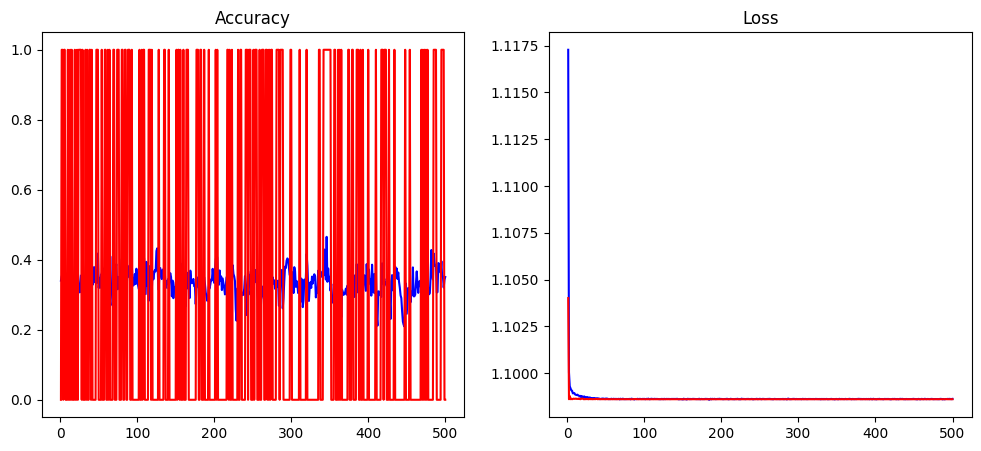

In [9]:
import matplotlib.pyplot as plt


def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="traning_acc")
    plt.plot(x, val_accuracy, "r", label="traning_acc")
    plt.title("Accuracy")
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="traning_acc")
    plt.plot(x, val_loss, "r", label="traning_acc")
    plt.title("Loss")
    #plt.savefig('./training-pics/prom_full-50epoch/test.svg', bbox_inches='tight')
    
plot_history(history)

In [16]:
input_shape = (2, 2)
x1 = tf.random.normal(input_shape)

x2 = tf.random.normal(input_shape)
y = tf.keras.layers.Add()([x1, x2])
print(x1)
print(x2)
print(y)


tf.Tensor(
[[-0.3290839  0.6926539]
 [-1.2451108  0.9814021]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.4382249   0.54180604]
 [-1.6991026   0.3091545 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.76730883  1.2344599 ]
 [-2.9442134   1.2905567 ]], shape=(2, 2), dtype=float32)


In [25]:
def load_data_test(num_of_bases_before_CDS= 300):
    OffgeneData = load_seq_to_list("./AllOffgeneSeq1000/filtredData.fsa", 300)
    #OffgeneData = load_seq_to_list("./AllOffgeneSeq1000/AllOffgeneSeq1000.fsa", 300)
    random.shuffle(OffgeneData)

    CDS_Data = load_seq_to_list("./AllCDSeq/filtredData.fsa",300)
    #CDS_Data = load_seq_to_list("./AllCDSeq/AllCDSeq.fsa",300)
    random.shuffle(CDS_Data)
    CDS_Data = CDS_Data[:int(len(CDS_Data)*0.6)]

    PromData = load_seq_to_list("./AllPromotorSeq1000/filtredData.fsa", 300)
    #PromData = load_seq_to_list("./AllPromotorSeq1000/AllPromotorSeq1000.fsa", 300)
    random.shuffle(PromData)
    PromData = PromData[:int(len(PromData)*0.6)]

    return CDS_Data, OffgeneData, PromData

def load_seq_to_list(file, amountOfbases, prom_crop_out = False):
    seqList = []
    with open(file,"r") as f:
        parser = fastaparser.Reader(f, parse_method='quick')
        #parser = shuffle(parser, 1)
        for s in parser:
            seq = s.sequence
            if prom_crop_out:
                if 'Promotor' in file:
                    if s.header.split(" ")[2] == "n" : start = 0
                    else: start = len(s.sequence) - int(s.header.split(" ")[2]) 
                    seq = seq[start-1:]
            i = amountOfbases
            while i < len(seq):
                if len(seqList) > 100 : return seqList
                for letter in alphabet:
                    if letter in seq[(i-amountOfbases):i]: continue
                seqList.append(seq[(i-amountOfbases):i])
                i += amountOfbases
    
    return seqList


CDS_Data, OffgeneData, PromData=load_data(1000)

In [34]:
import fastaparser
def promtest(file):    
    with open(file, 'r') as fastafile:
        parser = fastaparser.Reader(fastafile, parse_method='quick')

        total = 0
        weird = 0
        lenofweird = []
        total_len_weird = 0
        nnbef300 = 0
        for seq in parser:
            total += 1
            cds = seq.header.split(" ")[2]
            if cds != "n" : 
                if int(cds) < 300 : nnbef300 += 1
                lenofweird.append([seq.header,len(seq.sequence)])
            """ if len(seq.sequence) != 500 :
                weird += 1
                total_len_weird += len(seq.sequence) """
                
        

    print(total)
    #print(weird)
    #print(total_len_weird/weird)
    print(lenofweird[:20])
    print(total - nnbef300)

promtest("./AllPromotorSeq1000/filtredData.fsa")

15883373
[['>-Aaosphaeria_arxii-2 cds-XP_033388677.1 66', 1000], ['>-Aaosphaeria_arxii-3 cds-XP_033388677.1 55', 1000], ['>-Aaosphaeria_arxii-4 cds-XP_033388678.1 55', 1000], ['>-Aaosphaeria_arxii-6 cds-XP_033388679.1 52', 1000], ['>-Aaosphaeria_arxii-7 cds-XP_033388679.1 51', 1000], ['>-Aaosphaeria_arxii-8 cds-XP_033388679.1 53', 1000], ['>-Aaosphaeria_arxii-9 cds-XP_033388679.1 51', 1000], ['>-Aaosphaeria_arxii-12 cds-XP_033388680.1 71', 1000], ['>-Aaosphaeria_arxii-13 cds-XP_033388680.1 61', 1000], ['>-Aaosphaeria_arxii-14 cds-XP_033388680.1 63', 1000], ['>-Aaosphaeria_arxii-15 cds-XP_033388681.1 48', 1000], ['>-Aaosphaeria_arxii-16 cds-XP_033388681.1 46', 1000], ['>-Aaosphaeria_arxii-17 cds-XP_033388681.1 46', 1000], ['>-Aaosphaeria_arxii-18 cds-XP_033388681.1 48', 1000], ['>-Aaosphaeria_arxii-22 cds-XP_033388683.1 425', 1000], ['>-Aaosphaeria_arxii-23 cds-XP_033388683.1 42', 1000], ['>-Aaosphaeria_arxii-24 cds-XP_033388684.1 581', 1000], ['>-Aaosphaeria_arxii-25 cds-XP_033388685.1

In [41]:
# pocet sekvenci u promotoru
import fastaparser
def promtest2(file):    
    with open(file, 'r') as fastafile:
        parser = fastaparser.Reader(fastafile, parse_method='quick')

        total = 0
        weird = 0
        lenofweird = []
        total_len_weird = 0
        nnbef300 = 0
        len300 = 0
        letterinseq = 0
        for seq in parser:
            total += 1
            cds = seq.header.split(" ")[2]
            if len(seq.sequence) < 300 : len300 +=1; continue
            if cds != "n" : 
                if int(cds) < 300 : nnbef300 += 1
                continue
            for letter in alphabet:
                    if letter in seq:
                        letterinseq +=1 
                        

    print(total)
    print(nnbef300)
    print(len300)
    print(letterinseq)
    print(total - nnbef300- len300 - letterinseq)
    

promtest2("./AllPromotorSeq1000/filtredData.fsa")
promtest2("./AllPromotorSeq500/filtredData.fsa")
promtest2("./AllPromotorSeq300/filtredData.fsa")           

15883373
11112829
60455
0
4710089
15966215
11181535
42869
0
4741811
15968808
11187963
34156
0
4746689


In [38]:
import string
alphabet = list(string.ascii_letters)
alphabet.remove("A")
alphabet.remove("C")
alphabet.remove("G")
alphabet.remove("T")
alphabet.remove("a")
alphabet.remove("c")
alphabet.remove("g")
alphabet.remove("t")
print(alphabet)

['b', 'd', 'e', 'f', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 'u', 'v', 'w', 'x', 'y', 'z', 'B', 'D', 'E', 'F', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [60]:
# pocet sekvenci ziskan timto algoritmem
def load_seq_to_list(file, amountOfbases, prom_crop_out = False):
    seqList = []
    seqe = 0
    step = 100
    with open(file,"r") as f:
        parser = fastaparser.Reader(f, parse_method='quick')
        #parser = shuffle(parser, 1)
        for s in parser:
            seq = s.sequence
            if prom_crop_out:
                if 'Promotor' in file:
                    if s.header.split(" ")[2] == "n" : start = 1
                    else: start = len(s.sequence) - int(s.header.split(" ")[2]) 
                    seq = seq[start-1:]
            i = 0
            while i + amountOfbases < len(seq) + 1:
                for letter in alphabet:
                    if letter in seq[(i):i + amountOfbases]: continue
                seqe += 1
                i += step
    print(seqe)

load_seq_to_list('./AllPromotorSeq1000/filtredData.fsa',300, True)
load_seq_to_list('./AllPromotorSeq500/filtredData.fsa',300, True)
load_seq_to_list('./AllPromotorSeq300/filtredData.fsa',300, True)

27240114
12922648
4751597


In [54]:
a = 'A'*10 + 'B'*10
b =  a[0-1:]
print(a)
print(b)

AAAAAAAAAABBBBBBBBBB
B


In [10]:
CDS = load_seq_to_list("./Val_Data/FiltredAllValCDSeq.fsa",300)
Offgene = load_seq_to_list("./Val_Data/AllValOffgeneSeq1000.fsa",300)
PromData = load_seq_to_list("./Val_Data/AllValPromotorSeq1000.fsa",300)

NameError: name 'lenofweird' is not defined

In [25]:
""" a = "ABCDEFGHCHIJKLMNOPQRSTUVWXY"
len_a = len(a)
print(len(a))
i = 0
window = 4
stride = 2
while window <= len_a:
    print(a[i:window])
    i += stride
    window += stride """


x = [toNumbers(x) for x in PromData[1500]]
X = []
X.append(x)
X= np.asarray(X, dtype=np.int32)
print(X)

predictions = model.predict(X)
print(predictions)
predictions = np.argmax(predictions, axis=1)
print(predictions)

[[0 2 0 2 3 0 2 3 0 2 0 2 2 0 2 1 3 0 2 1 1 0 0 2 2 3 1 3 3 3 1 1 1 0 1 1
  0 1 0 1 0 0 3 0 1 0 2 3 0 2 1 3 3 1 2 3 0 1 0 1 2 0 0 2 2 1 3 1 0 0 2 2
  2 0 0 0 2 1 3 2 3 2 3 2 2 0 0 2 0 1 2 1 1 2 0 3 1 2 1 1 2 0 3 2 0 3 2 1
  0 1 1 1 2 2 1 1 1 3 2 1 3 1 0 3 0 1 0 1 0 0 2 1 3 2 1 1 1 0 0 3 0 0 3 2
  2 1 0 1 1 0 3 1 1 1 1 1 1 2 0 2 1 1 1 2 3 0 3 0 1 1 1 1 1 3 2 3 2 2 0 0
  0 2 0 0 3 3 3 2 3 2 0 2 0 0 0 1 0 2 2 2 3 3 2 0 1 2 0 2 3 2 0 1 1 1 0 1
  1 0 1 0 1 3 0 0 3 0 3 0 0 1 0 1 1 0 3 0 0 2 0 3 3 2 0 1 1 1 2 0 0 0 3 2
  0 1 3 0 1 1 2 0 0 1 3 0 2 1 0 1 0 0 2 0 1 1 3 2 1 0 1 0 3 0 3 3 3 3 3 1
  0 3 1 3 0 0 3 0 0 1 1 0]]
1/1 [==============================] - 0s 25ms/step
[[1.5173954e-01 1.8353479e-05 8.4824210e-01]]
[2]


In [6]:
import fastaparser
FILE_PATH =  "./data/Saccharomyces_cerevisiae/GCF_000146045.2_R64_genomic.fna"
RANGE = [350,1000]
SEQUENCE_NAME = "NC_001133.9"

def get_sequence(FILE_PATH, RANGE, SEQUENCE_NAME):
    
    Range_start = RANGE[0]
    Range_end = RANGE[1]
     

    with open(FILE_PATH, 'r') as FastaFile:
        parser = fastaparser.Reader(FastaFile, parse_method='quick')
    
        for seq in parser:
            if SEQUENCE_NAME not in seq.header: continue
            print("Sequence:", seq.header)
            sequence = seq.sequence
            sequence_len = len(sequence)
            print("Sequence:", sequence_len)
            if sequence_len < 300 :
                print("SEKVENCE JE MOC KRATKA, VELIKOST JEN: ", sequence_len)

            if Range_start < 149 or sequence_len < Range_end + 151:
                print("ZMENTE RANGE, SEKVENCE JE MOC NA KRAJICH")

            return sequence[Range_start: Range_end]

        
seq = get_sequence(FILE_PATH, RANGE, SEQUENCE_NAME)
print(seq)

def IterateOverSeq(seq, i):
    window = 300
    stride = 1
    len(seq)
    while window <= len(seq):
        print(a[i:window])
        i += stride
        window += stride 
        print()



Sequence: >NC_001133.9 Saccharomyces cerevisiae S288C chromosome I, complete sequence
Sequence: 230218
CACACGTGCTTACCCTACCACTTTATACCACCACCACATGCCATACTCACCCTCACTTGTATACTGATTTTACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTCCACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATTATGCACGGCACTTGCCTCAGCGGTCTATACCCTGTGCCATTTACCCATAACGCCCATCATTATCCACATTTTGATATCTATATCTCATTCGGCGGTcccaaatattgtataaCTGCCCTTAATACATACGTTATACCACTTTTGCACCATATACTTACCACTCCATTTATATACACTTATGTCAATATTACAGAAAAATCCCCACAAAAATCacctaaacataaaaatattctacttttcaacaataataCATAAACATATTGGCTTGTGGTAGCAACACTATCATGGTATCACTAACGTAAAAGTTCCTCAATATTGCAATTTGCTTGAACGGATGCTATTTCAGAATATTTCGTACTTACACAGGCCATACATTAGAATAATATGTCACATCACTGTCGTAACACTCTTTATTCACCGAGCAATAATACGGTAGTGGCTCAAACTCATGCGGGTGCTATGA


In [3]:


from random import randrange
seq = "A"*300 + "B" * 300

print(randrange(-1))

ValueError: empty range for randrange()

: 

In [52]:
predictions

array([[1.2402892e-01, 8.7594062e-01, 3.0458183e-05]], dtype=float32)